In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('C:/Users/kosuke/dataset/spambase.csv')

In [3]:
df.head(10)

,Word_freq_make,Word_freq_address,Word_freq_all,Word_freq_3d,Word_freq_our,Word_freq_over,Word_freq_remove,Word_freq_internet,Word_freq_order,Word_freq_mail,...,Char_freq1,Char_freq2,Char_freq3,Char_freq4,Char_freq5,Char_freq6,Capital_run_length_average,Capital_run_length_longest,Capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
5,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
6,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
7,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
8,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,...,0.000,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1
9,0.00,0.00,0.25,0.0,0.38,0.25,0.25,0.00,0.00,0.00,...,0.022,0.044,0.0,0.663,0.000,0.000,1.243,11,184,1


In [4]:
df.describe()

,Word_freq_make,Word_freq_address,Word_freq_all,Word_freq_3d,Word_freq_our,Word_freq_over,Word_freq_remove,Word_freq_internet,Word_freq_order,Word_freq_mail,...,Char_freq1,Char_freq2,Char_freq3,Char_freq4,Char_freq5,Char_freq6,Capital_run_length_average,Capital_run_length_longest,Capital_run_length_total,Spam
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,...,4597.000000,4597.000000,4597.000000,4597.000000,4597.00000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.104625,0.213200,0.280433,0.065482,0.312417,0.095928,0.114307,0.105347,0.090126,0.239621,...,0.038605,0.139129,0.016896,0.269223,0.07587,0.044270,5.194211,52.197738,283.352621,0.394170
std,0.305479,1.291121,0.504121,1.395757,0.672758,0.273934,0.391597,0.401235,0.278728,0.644997,...,0.243575,0.270451,0.109290,0.816004,0.24598,0.429527,31.743108,194.972704,606.581007,0.488725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.00000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.05200,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.00300,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
X = pd.DataFrame()
X = df.drop(['Spam'],1)
y = df['Spam']

In [6]:
X.head()

,Word_freq_make,Word_freq_address,Word_freq_all,Word_freq_3d,Word_freq_our,Word_freq_over,Word_freq_remove,Word_freq_internet,Word_freq_order,Word_freq_mail,...,Word_freq_conference,Char_freq1,Char_freq2,Char_freq3,Char_freq4,Char_freq5,Char_freq6,Capital_run_length_average,Capital_run_length_longest,Capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15,54
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4,112


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Spam, dtype: int64

In [8]:
#標準化　Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
X_scaled

array([[-0.34253175,  0.33060139,  0.71333277, ..., -0.04531275,
         0.04515104, -0.00882521],
       [ 0.34498878,  0.05174367,  0.4355916 , ..., -0.00252716,
         0.25033028,  1.22774761],
       [-0.34253175, -0.16514567, -0.55634113, ..., -0.05221264,
        -0.06256806, -0.15226766],
       ...,
       [-0.34253175, -0.16514567, -0.55634113, ..., -0.1057734 ,
        -0.20619353, -0.3550656 ],
       [ 0.21403249, -0.16514567,  0.79268739, ..., -0.1261895 ,
        -0.2420999 , -0.35341683],
       [-0.34253175, -0.16514567,  1.9234907 , ..., -0.12316489,
        -0.24722938, -0.42266491]])

In [10]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [11]:
#Learning
log_reg = LogisticRegression(C=10)
log_reg.fit(X_train, y_train)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

coef:[[ -0.06742605  -0.19340165   0.08590721   2.62076407   0.36980262
    0.18240076   1.0560498    0.23178254   0.11121194   0.06754861
   -0.06539226  -0.15040478  -0.03744241   0.02342523   0.21067092
    0.94825915   0.43025473   0.07203797   0.16999625   0.93213815
    0.25490539   0.19688082   0.71384438   0.12259311  -4.27033972
   -0.49285269 -11.8935669    0.46832108  -1.26053228  -1.15579891
   -0.0799365    0.05783386  -0.36997643   0.16285553  -0.88149079
    0.39500421  -0.13687484  -0.14963468  -0.43725165  -0.19814979
   -3.73083175  -2.15994338  -0.40985951  -1.28591407  -0.92787964
   -1.21309596  -0.13275649  -0.79667131  -0.33840617  -0.05511169
   -0.07964277   0.20990731   1.60700215   1.48164544  -0.50539717
    1.66769121   0.42580957]]
intercept:[-5.00788981]


Accuracy = 0.9182608695652174
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       665
           1       0.93      0.87      0.90       485

   micro avg       0.92      0.92      0.92      1150
   macro avg       0.92      0.91      0.92      1150
weighted avg       0.92      0.92      0.92      1150



C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


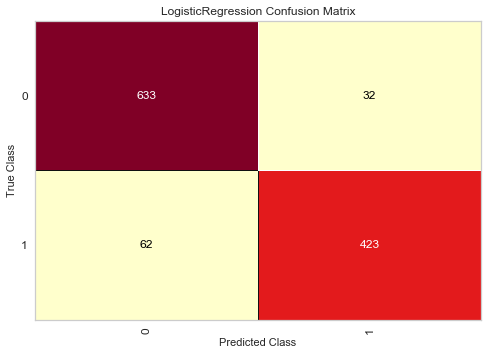

In [14]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(log_reg, classes=[0,1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [14]:
#cross validation
cv_score = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
#正解率を出力
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\li

,正解率
0,0.918478
1,0.930435
2,0.939064
3,0.922742
4,0.896627


In [15]:
#平均値を出力
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9214692245824857


In [16]:
coef_df = pd.DataFrame([X.columns,
                        log_reg.coef_.flatten()], index=['features', 'coef']).T

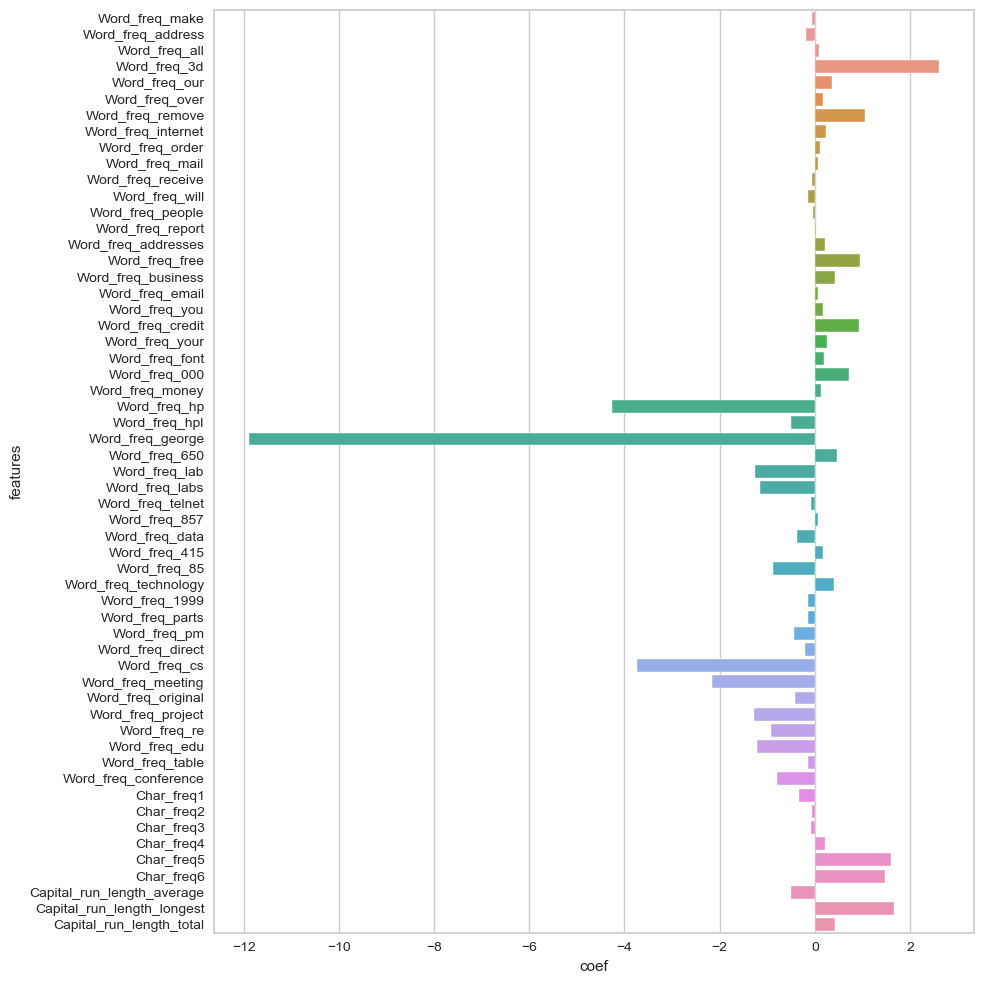

In [17]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()

In [18]:
odds = np.exp(log_reg.coef_).flatten()
odds_df = pd.DataFrame([X.columns, odds], index=['features', 'odds']).T

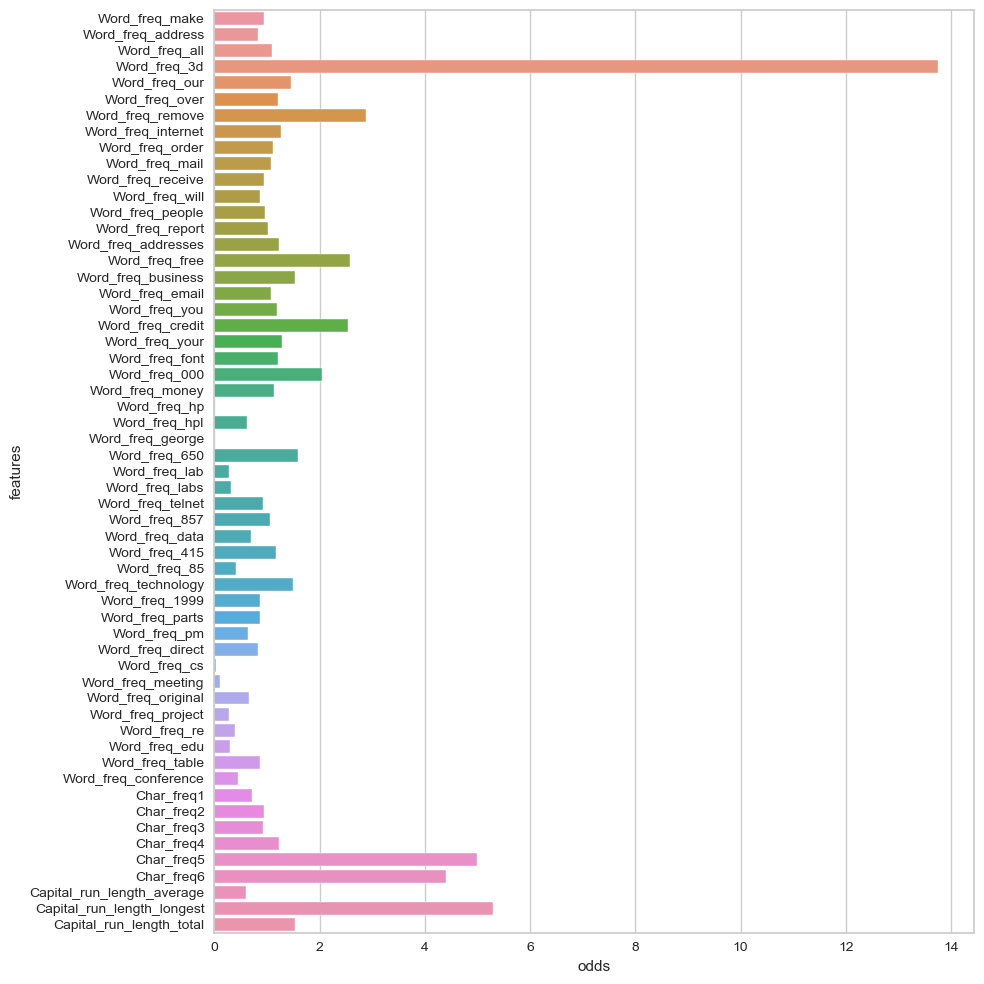

In [19]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


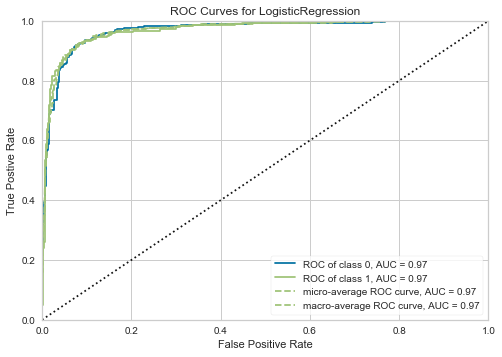

In [20]:
#ROCカーブとAUC
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(log_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


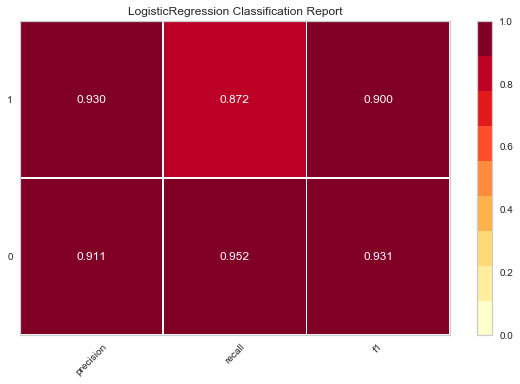

In [21]:
#result report
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(log_reg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

In [17]:
len(y [y == 0])

2785

In [16]:
len(y [y == 1])

1812